In [1]:
# importing the required libraries

import keras
from keras import optimizers
from keras.layers import Dense
from keras .models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# functioning for generating toy 2D data
import numpy as np
def gen_data(n=100):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

In [3]:
# Generating random samples of two different classes
x_train, y_train = gen_data()
print(y_train)

[1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1]


In [14]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [15]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
100/100 [==============================] - 0s - loss: 0.7340 - acc: 0.5700     
Epoch 2/20
100/100 [==============================] - 0s - loss: 0.7333 - acc: 0.5700     
Epoch 3/20
100/100 [==============================] - 0s - loss: 0.7325 - acc: 0.5700     
Epoch 4/20
100/100 [==============================] - 0s - loss: 0.7319 - acc: 0.5700     
Epoch 5/20
100/100 [==============================] - 0s - loss: 0.7311 - acc: 0.5700     
Epoch 6/20
100/100 [==============================] - 0s - loss: 0.7305 - acc: 0.5700     
Epoch 7/20
100/100 [==============================] - 0s - loss: 0.7299 - acc: 0.5700     
Epoch 8/20
100/100 [==============================] - 0s - loss: 0.7293 - acc: 0.5700     
Epoch 9/20
100/100 [==============================] - 0s - loss: 0.7288 - acc: 0.5700     
Epoch 10/20
100/100 [==============================] - 0s - loss: 0.7282 - acc: 0.5700     
Epoch 11/20
100/100 [==============================] - 0s - loss: 0.7276 - acc: 0.5700   

In [16]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

  32/1000 [..............................] - ETA: 0s

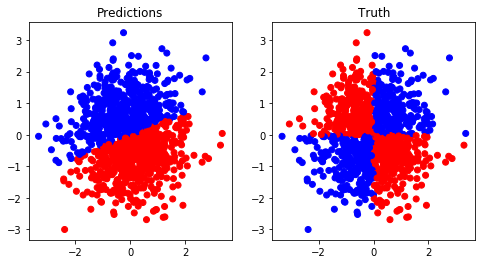

In [17]:
# Ploting the predictions of the perceptron model against ground truth
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [16]:
# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
SGD = optimizers.SGD(lr=0.08, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=SGD,
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [17]:
# Training the MLP on the 2D data
model2.fit(x_train, y_train, epochs=200, verbose=2)

Epoch 1/200
0s - loss: 0.9715 - acc: 0.4300
Epoch 2/200
0s - loss: 0.7381 - acc: 0.4000
Epoch 3/200
0s - loss: 0.7270 - acc: 0.5700
Epoch 4/200
0s - loss: 0.7205 - acc: 0.5700
Epoch 5/200
0s - loss: 0.6844 - acc: 0.5700
Epoch 6/200
0s - loss: 0.6928 - acc: 0.4600
Epoch 7/200
0s - loss: 0.6825 - acc: 0.5300
Epoch 8/200
0s - loss: 0.6755 - acc: 0.6600
Epoch 9/200
0s - loss: 0.6694 - acc: 0.5900
Epoch 10/200
0s - loss: 0.6722 - acc: 0.5900
Epoch 11/200
0s - loss: 0.6621 - acc: 0.6600
Epoch 12/200
0s - loss: 0.6684 - acc: 0.6800
Epoch 13/200
0s - loss: 0.6848 - acc: 0.4500
Epoch 14/200
0s - loss: 0.6695 - acc: 0.6100
Epoch 15/200
0s - loss: 0.6543 - acc: 0.7200
Epoch 16/200
0s - loss: 0.6627 - acc: 0.6900
Epoch 17/200
0s - loss: 0.6687 - acc: 0.6500
Epoch 18/200
0s - loss: 0.6563 - acc: 0.7300
Epoch 19/200
0s - loss: 0.6522 - acc: 0.7200
Epoch 20/200
0s - loss: 0.6579 - acc: 0.6700
Epoch 21/200
0s - loss: 0.6606 - acc: 0.6500
Epoch 22/200
0s - loss: 0.6505 - acc: 0.7600
Epoch 23/200
0s - l

  32/1000 [..............................] - ETA: 1s

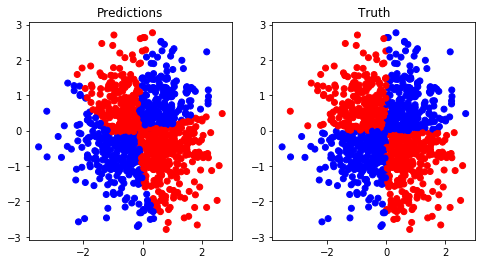

In [18]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model2.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
